# Exploration for Data Scientists Survey Data

---
- Done by: Vidya Dayanidhi
---

## Overview

In 2017, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) conducted a survey on a large range of users registered as the data scientist in their platform. The survey data are broadly covered the skill set of the data scientists, the demographic of the data scientists, the feedback of the platform and many other information. 



## Part 1 - What we could know about the Data Scientists? 

### Libraries and data files
<a id="Load data"></a>
***


In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=a13b7765d535e5d493fb9c77d3a6f54616bc9da8455e9f1dc4fdbf57c6261a00
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import wget
import seaborn as sns # you can use other packages such as matplotlib too
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv'
DataSet = wget.download(link_to_data)

In [5]:
df_demog =  pd.read_csv("MCQResponses.csv")
df_demog.head()


,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5


<div class="alert alert-block alert-info">

From our data scientist survey data in the file MCQ Responses, we find that the following columns with True have NA values in them.

Certain columns such as GenderSelect, Country , Age, Employment Status, CodeWriter, CurrentJobTitleSelect, FormalEducation, CompensationAmount and CompensationCurrency do not have null values or NAs in them. 

Columns such as TitleFit, MLToolNextYearSelect, MLMethodNextYearSelect, LanguageRecommendationSelect, MajorSelect, FirstTrainingSelect, JobSatisfaction all have at least one NA value in them. 

This could be because in the survey the second group of columns must have been optional to fill. 

</div>



In [6]:
df_demog.isna().any()

GenderSelect                    False
Country                         False
Age                             False
EmploymentStatus                False
CodeWriter                      False
CurrentJobTitleSelect           False
TitleFit                         True
CurrentEmployerType              True
MLToolNextYearSelect             True
MLMethodNextYearSelect           True
LanguageRecommendationSelect     True
FormalEducation                 False
MajorSelect                      True
FirstTrainingSelect              True
CompensationAmount              False
CompensationCurrency            False
JobSatisfaction                  True
dtype: bool

**Report:** In the following image we can see how many not-null values are present in each of the columns.

All the main columns that did not have any NAs in them have a total of 4327 values. Whereas , columns such as TitleFit has only 4251 values. 

From the survey, we can see that MajorSelect is the column with the greatest number of NA values as it has the least non-null values of 3952. 

In [7]:
df_demog.count()

GenderSelect                    4327
Country                         4327
Age                             4327
EmploymentStatus                4327
CodeWriter                      4327
CurrentJobTitleSelect           4327
TitleFit                        4251
CurrentEmployerType             4275
MLToolNextYearSelect            4206
MLMethodNextYearSelect          4170
LanguageRecommendationSelect    4228
FormalEducation                 4327
MajorSelect                     3952
FirstTrainingSelect             4324
CompensationAmount              4327
CompensationCurrency            4327
JobSatisfaction                 4317
dtype: int64


**Report**: 
    On analysing the data, we find that 1263 respondents to the survey are currently working as Data Scientists. 





In [8]:
df_demog_ds = df_demog[df_demog['CurrentJobTitleSelect'] == 'Data Scientist']
df_demog_ds.shape[0]

1263

###Education
<a id="education"></a>
***
In data scientists job, education is important. Is it reasonable to ask data scientists to have a Master's or Doctoral degree? Let's find out. 


<div class="alert alert-block alert-warning">
    
**Report**: 
   The following plot depicts the Formal Education undertaken by the Data scientists who have responded to the survey.

From the chart , we can see that most of the Data Scientist have done a Master’s degree. 

The next level of Higher Education that data scientists possess is a Doctoral degree which is closely followed by Bachelor’s degree.
    
Very few of data scientists have either not had any formal education past high school, studied in some college without having a bachelor’s degree or undertook a professional degree.  
</div>

 

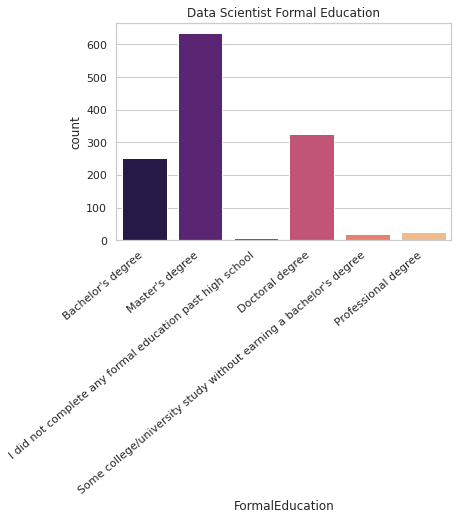

Number of Data Scientist with each type of Formal Education
Master's degree                                                      635
Doctoral degree                                                      326
Bachelor's degree                                                    252
Professional degree                                                   25
Some college/university study without earning a bachelor's degree     19
I did not complete any formal education past high school               6
Name: FormalEducation, dtype: int64

Percentage of Data Scientist with each type of Formal Education
Master's degree                                                      50.277118
Doctoral degree                                                      25.811560
Bachelor's degree                                                    19.952494
Professional degree                                                   1.979414
Some college/university study without earning a bachelor's degree     1.504355
I did 

In [9]:
ax= sns.countplot(x = 'FormalEducation',data = df_demog_ds, palette = 'magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Data Scientist Formal Education')
plt.show()
print('Number of Data Scientist with each type of Formal Education')
print(df_demog_ds['FormalEducation'].value_counts())
print('\nPercentage of Data Scientist with each type of Formal Education')
print(df_demog_ds['FormalEducation'].value_counts(normalize=True) * 100)

Number of Data scientist with a Master’s degree correspond to 635 which amounts to 50.27% of the survey respondents who are also data scientists. Only 6 data scientists haven’t done any formal education after high school and they are just 0.47% of the data science survey respondents. The above data gives a detailed number and percentage of data scientists according to their Higher education.  
 

### Salary
<a id="salary"></a>

Data science is considered a very well paying role, let's find out the salary information. Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have filtered the data and provided exchange rates in a file called *ConversionRates.csv* which should already be imported. 

First of all, you need to merge the multiple choice data with the *ConversionRates.csv* by using the compensation currency and originCountry respectively. And then you will need to multiply the compensation amount with exchangeRateAUS to have the Australian dollors. [ Just picked a basic way for currency conversion - Actual Formula can be taken online ]

In [10]:
df_con= pd.read_csv("ConversionRates.csv")
df_merged=df_demog_ds.merge(df_con,left_on=["CompensationCurrency"],right_on=["originCountry"],how='left')
df_merged.head()

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,Unnamed: 0,originCountry,exchangeRate
0,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,3.0,INR,0.015620
1,Male,Colombia,34,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that doesn't perform adv...,Spark / MLlib,"Ensemble Methods (e.g. boosting, bagging)",Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",156000000.0,COP,9,17.0,COP,0.000342
2,Male,Germany,41,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Self-employed,I don't plan on learning a new tool/technology,Factor Analysis,Python,I did not complete any formal education past h...,NaN,Work,150000.0,EUR,8,2.0,EUR,1.195826
3,Male,United Kingdom,36,Employed full-time,Yes,Data Scientist,Poorly,Employed by a company that performs advanced a...,Microsoft Azure Machine Learning,Proprietary Algorithms,Python,Doctoral degree,Electrical Engineering,University courses,130000.0,GBP,7,4.0,GBP,1.324188
4,Male,Portugal,30,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,TensorFlow,Monte Carlo Methods,Python,Master's degree,Physics,Kaggle competitions,30000.0,EUR,7,2.0,EUR,1.195826


In [11]:
exchangeRateAUS=df_merged['exchangeRate'].where(df_merged['originCountry'] == "AUD")
exchangeRateAUS=exchangeRateAUS.nlargest(1).values[0]
print(exchangeRateAUS)
df_merged["CompensationInAUD"]= np.where(df_merged['CompensationCurrency'] != 'AUD',df_merged["CompensationAmount"]*exchangeRateAUS,df_merged["CompensationAmount"])
df_merged.head()

0.8023100000000001


,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,Unnamed: 0,originCountry,exchangeRate,CompensationInAUD
0,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,3.0,INR,0.015620,7.621945e+04
1,Male,Colombia,34,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that doesn't perform adv...,Spark / MLlib,"Ensemble Methods (e.g. boosting, bagging)",Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",156000000.0,COP,9,17.0,COP,0.000342,1.251604e+08
2,Male,Germany,41,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Self-employed,I don't plan on learning a new tool/technology,Factor Analysis,Python,I did not complete any formal education past h...,NaN,Work,150000.0,EUR,8,2.0,EUR,1.195826,1.203465e+05
3,Male,United Kingdom,36,Employed full-time,Yes,Data Scientist,Poorly,Employed by a company that performs advanced a...,Microsoft Azure Machine Learning,Proprietary Algorithms,Python,Doctoral degree,Electrical Engineering,University courses,130000.0,GBP,7,4.0,GBP,1.324188,1.043003e+05
4,Male,Portugal,30,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,TensorFlow,Monte Carlo Methods,Python,Master's degree,Physics,Kaggle competitions,30000.0,EUR,7,2.0,EUR,1.195826,2.406930e+04


   
**Report**: 
   We have used the Currency Conversion dataset to convert the CompensationAmount provided by the data scientist respondents into AUD value. From this we find that the maximum salary that a data scientist earns in AUD to be *425224300.00*. The median of the salaries that data scientist get is *88254.1 AUD*.


In [13]:
print("Max salary(in AUD) is" , df_merged['CompensationInAUD'].max())


Max salary(in AUD) is 425224300.00000006


In [15]:
print("Median salary(in AUD) is ",df_merged['CompensationInAUD'].median())

Median salary(in AUD) is  88254.1


   
**Report**: 

In this part of the analysis, we find the Compensation amounts of all the Australian respondents. Using this data, we have plotted a box plot that shows the range of the Compensation Amounts for Australian respondents. 

From the box plot we can approximately see that the median is around 150000 AUD and 75% of the salaries of Australian respondents lie below 200000 AUD. Also, we can see that the highest salary is around 480000-490000 AUD as marked in the plot as an outlier. 
 


Text(0.5, 1.0, 'Boxplot of salary on Australia')

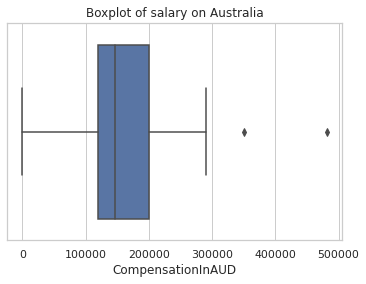

In [16]:
df_AusRepondents= df_merged[df_merged['Country'] == 'Australia']
sns.boxplot(x=df_AusRepondents['CompensationInAUD']).set_title("Boxplot of salary on Australia")

As expected from the box plot , the median salary of the Australian respondents is 147000.00 AUD. Also, the outlier point that we see on the box plot is the maximum salary which amounts to 481386.00 AUD

In [17]:
print("Maximum salary for Australian respondents" , df_AusRepondents['CompensationInAUD'].max())
print("Median salary for Australian respondents" , df_AusRepondents['CompensationInAUD'].median())

Maximum salary for Australian respondents 481386.00000000006
Median salary for Australian respondents 147000.0


There are some outliers in the Australian salary plot. We filter the salary of Australian respondents by removing any below 40,000 or above 250,000. 

**Report**: 
    In this part, we remove the salaries below 40000 AUD and above 250000 AUD to get rid of outliers. The resulting box plot is as below: 


Text(0.5, 1.0, 'Boxplot of filtered salary on Australia')

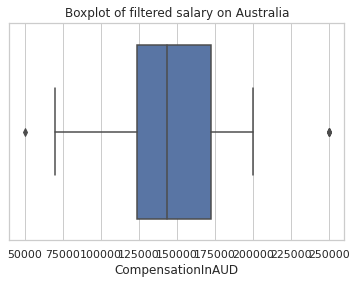

In [18]:
df_outlierAus=df_AusRepondents[(df_AusRepondents['CompensationInAUD']>=40000) & (df_AusRepondents['CompensationInAUD']<=250000)]
sns.boxplot(df_outlierAus['CompensationInAUD']).set_title("Boxplot of filtered salary on Australia")

From the above box plot after removing the outliers, (we are still not setting showFliers=False to show outliers within the filtered data) , we see that the median salary of the Australian respondents is less than 150000 AUD and the highest salary amount is 250000 AUD. 

The exact median of the filtered salary data is 143500 AUD and the maximum salary among the Australian respondents is 250000 AUD as expected from the box plot.

In [19]:
print("Maximum salary for Australian respondents after filter" , df_outlierAus['CompensationInAUD'].max())
print("Median salary for Australian respondents after filter" , df_outlierAus['CompensationInAUD'].median())


Maximum salary for Australian respondents after filter 250000.0
Median salary for Australian respondents after filter 143500.0


###Exploring the data scientist Demographics
<a id="demographics"></a>
***

#### Age
<a id="age"></a>
We build a boxplot to explore the age of all data scientists.

For the analysis of the age of data scientist, we have plotted this box plot. From the box plot we can see that the median age of the data scientists is around 32-33 years. About 75% of the data scientists are below the age of 38 years. 


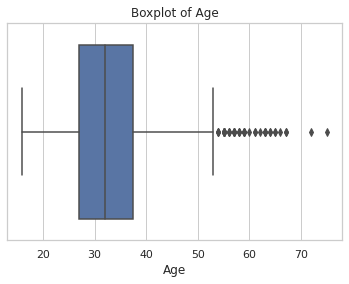

In [20]:
plt.title("Boxplot of Age")

ax = sns.boxplot(x=df_demog_ds["Age"])

In [22]:
print("Minimum age of the data scientists " ,df_demog_ds['Age'].min())
print("Maximum age of the data scientists " ,df_demog_ds['Age'].max())
print("First quartile of age of data scientists " ,df_demog_ds['Age'].quantile(0.25))
print("Third quartile of age of data scientists " ,df_demog_ds['Age'].quantile(0.75))

Minimum age of the data scientists  16
Maximum age of the data scientists  75
First quartile of age of data scientists  27.0
Third quartile of age of data scientists  37.5


In [23]:
print("Mean age of all the data scientists " ,df_demog_ds['Age'].mean())

Mean age of all the data scientists  33.72050673000792


In [24]:
print("Median age of all the data scientists " ,df_demog_ds['Age'].median())

Median age of all the data scientists  32.0


In [25]:
print("Number of data scientists aged between 24 and 60 are ",df_demog_ds[(df_demog_ds['Age']>24) & (df_demog_ds['Age']<60)].shape[0])

Number of data scientists aged between 24 and 60 are  1129


In [26]:
print("Number of respondents under 18 are ",df_demog_ds[df_demog_ds['Age']<18].shape[0])

Number of respondents under 18 are  1


#### Gender
<a id="gender"></a>
We are interested in the gender of respondents. Nowadays, the gender equity is important for companies and organizations. 


<div class="alert alert-block alert-info">

**Report**: 
In this section, we analyse the survey data based on the gender of the respondents. As we can see from the count plot below, the number of male respondents ( data scientists) is way higher than the 
other genders.  
</div>


Text(0.5, 1.0, 'Bar chat of Gender')

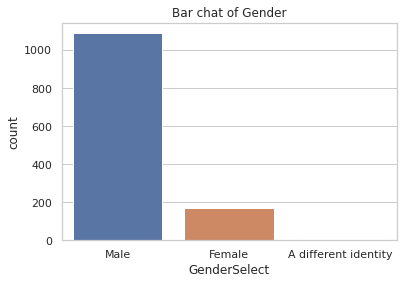

In [27]:
sns.countplot(x='GenderSelect',data=df_demog_ds).set_title("Bar chat of Gender")

<div>

Now let's see if any relationship between gender and age

So we create a box plot showing the age of all the data scientists according to gender (men, women and other identity).
</div>

Text(0.5, 1.0, 'Boxplot of Age with GenderSelect for data scientists')

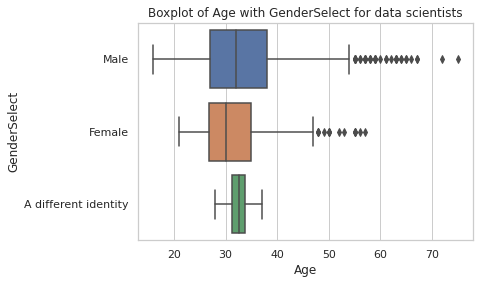

In [28]:
sns.boxplot(x="Age", y="GenderSelect", data=df_demog_ds).set_title("Boxplot of Age with GenderSelect for data scientists")


<div>

**Report:** The box plot shows the relationship between Age and Gender of data scientists from the survey data.  It can be seen that the median age of male and different identity members is greater than Female data scientists. However, the oldest data scientist of the survey data is a Male. 
</div>

<div>
 
**Report**: 
    We have plotted the percentage of data scientists based on their respective genders. From this chart, we can see that above 80 % of the data scientists are Males and less than 20 % are females with a very small percentage of people with a different identity. 
 
</div>

<BarContainer object of 3 artists>

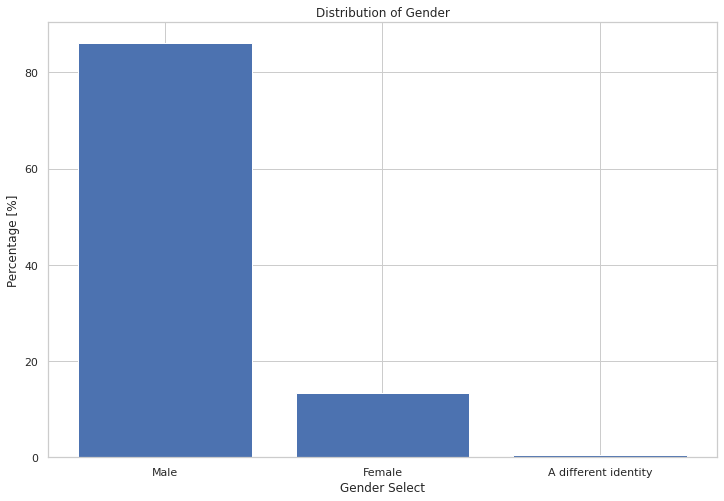

In [29]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Gender')
plt.xlabel('Gender Select')
plt.ylabel('Percentage [%]')

df_gender=df_demog['GenderSelect'].value_counts(normalize=True).mul(100).rename_axis('Gender').reset_index(name='Percentage')
plt.bar(df_gender['Gender'],df_gender['Percentage'])


####Country
<a id="country"></a>
The data scientists are working all over the world. The United States is regarded the largest data science community. India, China and some other countries are also having a fast growing recently. Is this true? Let's find out.

<div>
  
**Report**: 
   The below data depicts the top 5 countries with the highest number of data scientists. United States has the most number of data scientists equal to 414. India has the second largest data scientist community with 111 data scientists, followed by France with 60 data scientists and United Kingdom and Germany with 55 and 50 data scientist respectively.

</div>

In [30]:
df_country=df_demog_ds['Country'].value_counts()
df_country.head()

United States     414
India             111
France             60
United Kingdom     55
Germany            50
Name: Country, dtype: int64

In [31]:
# Show only one suitable plot of country: either Bar plot, count plot, or Boxplot (possible or not?)
# ax=sns.countplot(x='Country',data=df_demog_ds)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#NOT POSSIBLE

 <div class="alert alert-block alert-warning">
    
**Report**: 
    The below chart represents the percentage of data scientists in the top 5 countries – United States, India, France, United Kingdom, Germany. As expected from the previous analysis , United States leads with the highest percentage of data scientist of about 33% followed by India with only about 8% of data scientist of the world

</div>

<BarContainer object of 5 artists>

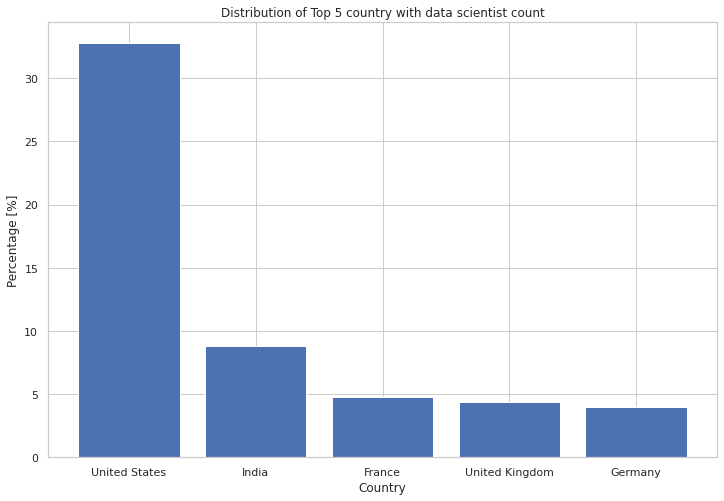

In [32]:
#percentage
plt.figure(figsize=(12,8))
plt.title('Distribution of Top 5 country with data scientist count')
plt.xlabel('Country')
plt.ylabel('Percentage [%]')

df_country_top5=df_demog_ds['Country'].value_counts(normalize=True).mul(100).head().rename_axis('Country').reset_index(name='Percentage')
df_country_top5
plt.bar(df_country_top5['Country'],df_country_top5['Percentage'])




<div>

Now we have some understanding about the country, let's see if there is any relationship between country, age and gender.

The mean and median of ages for each of the Gender for United States, India, Australia and Pakistan are as shown below. 

</div>



In [33]:
countries=["United States","India","Pakistan","Australia"]
for country in countries:
    print("\n\n",country)
    print("MEAN DATA")
    print(df_demog_ds[df_demog_ds['Country']==country].groupby(["GenderSelect"])["Age"].mean())
    print("\nMEDIAN DATA")
    print(df_demog_ds[df_demog_ds['Country']==country].groupby(["GenderSelect"])["Age"].median())



 United States
MEAN DATA
GenderSelect
A different identity    31.000000
Female                  33.436620
Male                    35.649123
Name: Age, dtype: float64

MEDIAN DATA
GenderSelect
A different identity    31
Female                  31
Male                    33
Name: Age, dtype: int64


 India
MEAN DATA
GenderSelect
Female    29.000000
Male      30.019802
Name: Age, dtype: float64

MEDIAN DATA
GenderSelect
Female    27
Male      28
Name: Age, dtype: int64


 Pakistan
MEAN DATA
GenderSelect
Male    32
Name: Age, dtype: int64

MEDIAN DATA
GenderSelect
Male    27
Name: Age, dtype: int64


 Australia
MEAN DATA
GenderSelect
Female    32.6
Male      35.0
Name: Age, dtype: float64

MEDIAN DATA
GenderSelect
Female    31
Male      34
Name: Age, dtype: int64


<div>

From the above analysis, we can see that the mean and median age of data scientists of all genders are almost the same for each of the countries considered. But almost in every country the average age of men is higher than the other genders. Only in the United States we have data scientists of different identity and their mean and median age is 31 years. In Pakistan there are only Male data scientists and their mean age is 32 and median age is 27 years.
</div>


## Part 2 - Data Science Job Advertising Data

In this part, we use the text processing skills to find out the insights in data science job advertising Data.

### Load the data and Extract the high frequency words
<a id="text"></a>

Firstly, we load the [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv) data and sub-set out of the job description from it.

In [34]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
#from tqdm import tqdm
import codecs
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
df_text = pd.read_csv('JobPostings.csv')

<div>

**Report**: 
   The goal is to identify most frequently used words in a job description posted for data science jobs.
   
  As a first step, we are required to tokenize the job descriptions by using NLTK package- RegexpTokenizer. Through this, we have separated each word of the job description column into tokens. 
 
 
</div>

In [36]:
lower = []
for item in df_text['job_description']:
    lower.append(item.lower())           # lowercase description

tokens = []
 
raw = pd.Series(lower)
tokenizer = RegexpTokenizer(r"\W+", gaps=True)
for rawString in raw:
    tokens.append(tokenizer.tokenize(rawString))


In [37]:
updated_tokens=[]
for tokenizedString in tokens:
    updated_tokens.extend(tokenizedString)


<div>

**Report**: 
    
  After identifying and removing stop words from our list of tokens, we execute the FreqDist() method to identify each word frequency and below displayed are few words with frequency above 6000. In our tokens list, there are 96 words with frequency above 6000. 

</div>




In [38]:
stop_words = set(stopwords.words('english'))

In [39]:
filtered_tokens = [token for token in updated_tokens if token not in stop_words]

In [40]:
freq6000 = FreqDist(filtered_tokens)
# Your Code
# finding top common words with document frequencies > 6000
sorted_df=pd.DataFrame(list(freq6000.items()), columns = ["Word","Frequency"]).sort_values(by=['Frequency'],ascending=False)
# you may use function FreqDist() and sort()

In [41]:
sorted_df[sorted_df['Frequency']>6000]

,Word,Frequency
39,data,128089
145,experience,59201
52,business,33925
58,work,28383
173,learning,27304
...,...,...
281,level,6410
262,must,6231
12,apply,6203
156,one,6184


<div>

Then,

We sort and display the top 10 high frequency words in 'freq6000' as follows.
</div>


In [42]:
#freq6000.most_common(10)
for word, frequency in freq6000.most_common(10):
    print(u'{};{}'.format(word, frequency))


data;128089
experience;59201
business;33925
work;28383
learning;27304
science;27064
analytics;21993
team;21157
machine;20770
analysis;20672


<div>

So, the 10 most commonly used words in data science job descriptions are data, experience, business, work, learning, science, analytics, team, machine and analysis. 
</div>


In [43]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
['{0} -> {1}'.format(w, stemmer.stem(w)) for w in filtered_tokens]


['read -> read',
 'people -> peopl',
 'saying -> say',
 'working -> work',
 'farmers -> farmer',
 'join -> join',
 'team -> team',
 'diverse -> divers',
 'professionals -> profession',
 'farmers -> farmer',
 'acquire -> acquir',
 'skills -> skill',
 'job -> job',
 'apply -> appli',
 'learned -> learn',
 'knowledge -> knowledg',
 'future -> futur',
 'roles -> role',
 'farmers -> farmer',
 'farmers -> farmer',
 'insurance -> insur',
 'also -> also',
 'offers -> offer',
 'extensive -> extens',
 'training -> train',
 'opportunities -> opportun',
 'award -> award',
 'winning -> win',
 'university -> univers',
 'farmers -> farmer',
 'named -> name',
 'training -> train',
 'magazine -> magazin',
 'amongst -> amongst',
 'top -> top',
 '10 -> 10',
 'corporate -> corpor',
 'training -> train',
 'units -> unit',
 'world -> world',
 'start -> start',
 'career -> career',
 'farmers -> farmer',
 'today -> today',
 'job -> job',
 'summary -> summari',
 'enterprise -> enterpris',
 'data -> data',
 'sc

In [44]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
['{0} -> {1}'.format(w, stemmer.stem(w)) for w in filtered_tokens]

['read -> read',
 'people -> peopl',
 'saying -> say',
 'working -> work',
 'farmers -> farmer',
 'join -> join',
 'team -> team',
 'diverse -> divers',
 'professionals -> profession',
 'farmers -> farmer',
 'acquire -> acquir',
 'skills -> skill',
 'job -> job',
 'apply -> appli',
 'learned -> learn',
 'knowledge -> knowledg',
 'future -> futur',
 'roles -> role',
 'farmers -> farmer',
 'farmers -> farmer',
 'insurance -> insur',
 'also -> also',
 'offers -> offer',
 'extensive -> extens',
 'training -> train',
 'opportunities -> opportun',
 'award -> award',
 'winning -> win',
 'university -> univers',
 'farmers -> farmer',
 'named -> name',
 'training -> train',
 'magazine -> magazin',
 'amongst -> amongst',
 'top -> top',
 '10 -> 10',
 'corporate -> corpor',
 'training -> train',
 'units -> unit',
 'world -> world',
 'start -> start',
 'career -> career',
 'farmers -> farmer',
 'today -> today',
 'job -> job',
 'summary -> summari',
 'enterprise -> enterpris',
 'data -> data',
 'sc

In [47]:
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
['{0} -> {1}'.format(w, lemmatizer.lemmatize(w)) for w in filtered_tokens]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['read -> read',
 'people -> people',
 'saying -> saying',
 'working -> working',
 'farmers -> farmer',
 'join -> join',
 'team -> team',
 'diverse -> diverse',
 'professionals -> professional',
 'farmers -> farmer',
 'acquire -> acquire',
 'skills -> skill',
 'job -> job',
 'apply -> apply',
 'learned -> learned',
 'knowledge -> knowledge',
 'future -> future',
 'roles -> role',
 'farmers -> farmer',
 'farmers -> farmer',
 'insurance -> insurance',
 'also -> also',
 'offers -> offer',
 'extensive -> extensive',
 'training -> training',
 'opportunities -> opportunity',
 'award -> award',
 'winning -> winning',
 'university -> university',
 'farmers -> farmer',
 'named -> named',
 'training -> training',
 'magazine -> magazine',
 'amongst -> amongst',
 'top -> top',
 '10 -> 10',
 'corporate -> corporate',
 'training -> training',
 'units -> unit',
 'world -> world',
 'start -> start',
 'career -> career',
 'farmers -> farmer',
 'today -> today',
 'job -> job',
 'summary -> summary',
 'e

In [49]:
#nltk.download('averaged_perceptron_tagger')
tagged_sent = nltk.tag.pos_tag(filtered_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


<div>

In this section, the nouns and verbs that are used in the job descriptions of data science roles can be identified.

Here, we see the nouns used in job descriptions
</div>

In [50]:
all_nouns = [w for w,t in tagged_sent if t.startswith('NN')]
all_nouns

['people',
 'farmers',
 'diverse',
 'professionals',
 'farmers',
 'skills',
 'job',
 'knowledge',
 'future',
 'farmers',
 'farmers',
 'insurance',
 'training',
 'opportunities',
 'university',
 'farmers',
 'magazine',
 'amongst',
 'units',
 'world',
 'career',
 'farmers',
 'today',
 'job',
 'enterprise',
 'data',
 'scientist',
 'part',
 'data',
 'science',
 'team',
 'analysis',
 'vis',
 'ualization',
 'services',
 'lines',
 'business',
 'service',
 'functions',
 'farmers',
 'insurance',
 'group',
 'data',
 'scientist',
 'work',
 'end',
 'end',
 'solutions',
 'part',
 'team',
 'design',
 'models',
 'datasets',
 'models',
 'results',
 'teams',
 'job',
 'functions',
 'data',
 'variety',
 'sources',
 'text',
 'files',
 'variety',
 'formats',
 'json',
 'parquet',
 'prepare',
 'data',
 'analysis',
 'describe',
 'data',
 'aggregation',
 'summarization',
 'build',
 'tools',
 'reports',
 'dashboards',
 'applications',
 'clients',
 'patterns',
 'trends',
 'data',
 'comparisons',
 'data',
 'point

<div>

The verbs that are used in the job descriptions are as follows:
</div>

In [51]:
all_verbs = [w for w,t in tagged_sent if t.startswith('VB')]
all_verbs

['saying',
 'working',
 'join',
 'acquire',
 'learned',
 'roles',
 'offers',
 'winning',
 'named',
 'training',
 'training',
 'start',
 'modeling',
 'shared',
 'pulling',
 'cleaning',
 'evaluating',
 'presenting',
 'extract',
 'databases',
 'structured',
 'using',
 'web',
 'allow',
 'view',
 'using',
 'including',
 'pca',
 'ring',
 'resampling',
 'monte',
 'testing',
 'testing',
 'using',
 'documented',
 'preferred',
 'least',
 'etc',
 'following',
 'required',
 'following',
 'utilize',
 'learning',
 'pca',
 'arima',
 'svm',
 'etc',
 'asana',
 'committed',
 'posting',
 'comprising',
 'make',
 'h',
 'looking',
 'data',
 'dealing',
 'using',
 'modeling',
 'candidate',
 'using',
 'learning',
 'plus',
 'working',
 'structured',
 'experience',
 'plus',
 'explain',
 'considering',
 'minimum',
 'working',
 'following',
 'developing',
 'using',
 'spark',
 'seasoned',
 'programming',
 'spark',
 'expert',
 'experience',
 'learning',
 'supporting',
 'required',
 'phd',
 'preferred',
 'saying',
 '